In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, log_loss
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd

# Loading the dataset for preprocessing
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Creating the 'Room' feature
df['Room'] = 0
df.loc[df['reserved_room_type'] == df['assigned_room_type'], 'Room'] = 1
# Creating the 'net_cancelled' feature
df['net_cancelled'] = 0
df.loc[df['previous_cancellations'] > df['previous_bookings_not_canceled'], 'net_cancelled'] = 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\2914626048.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


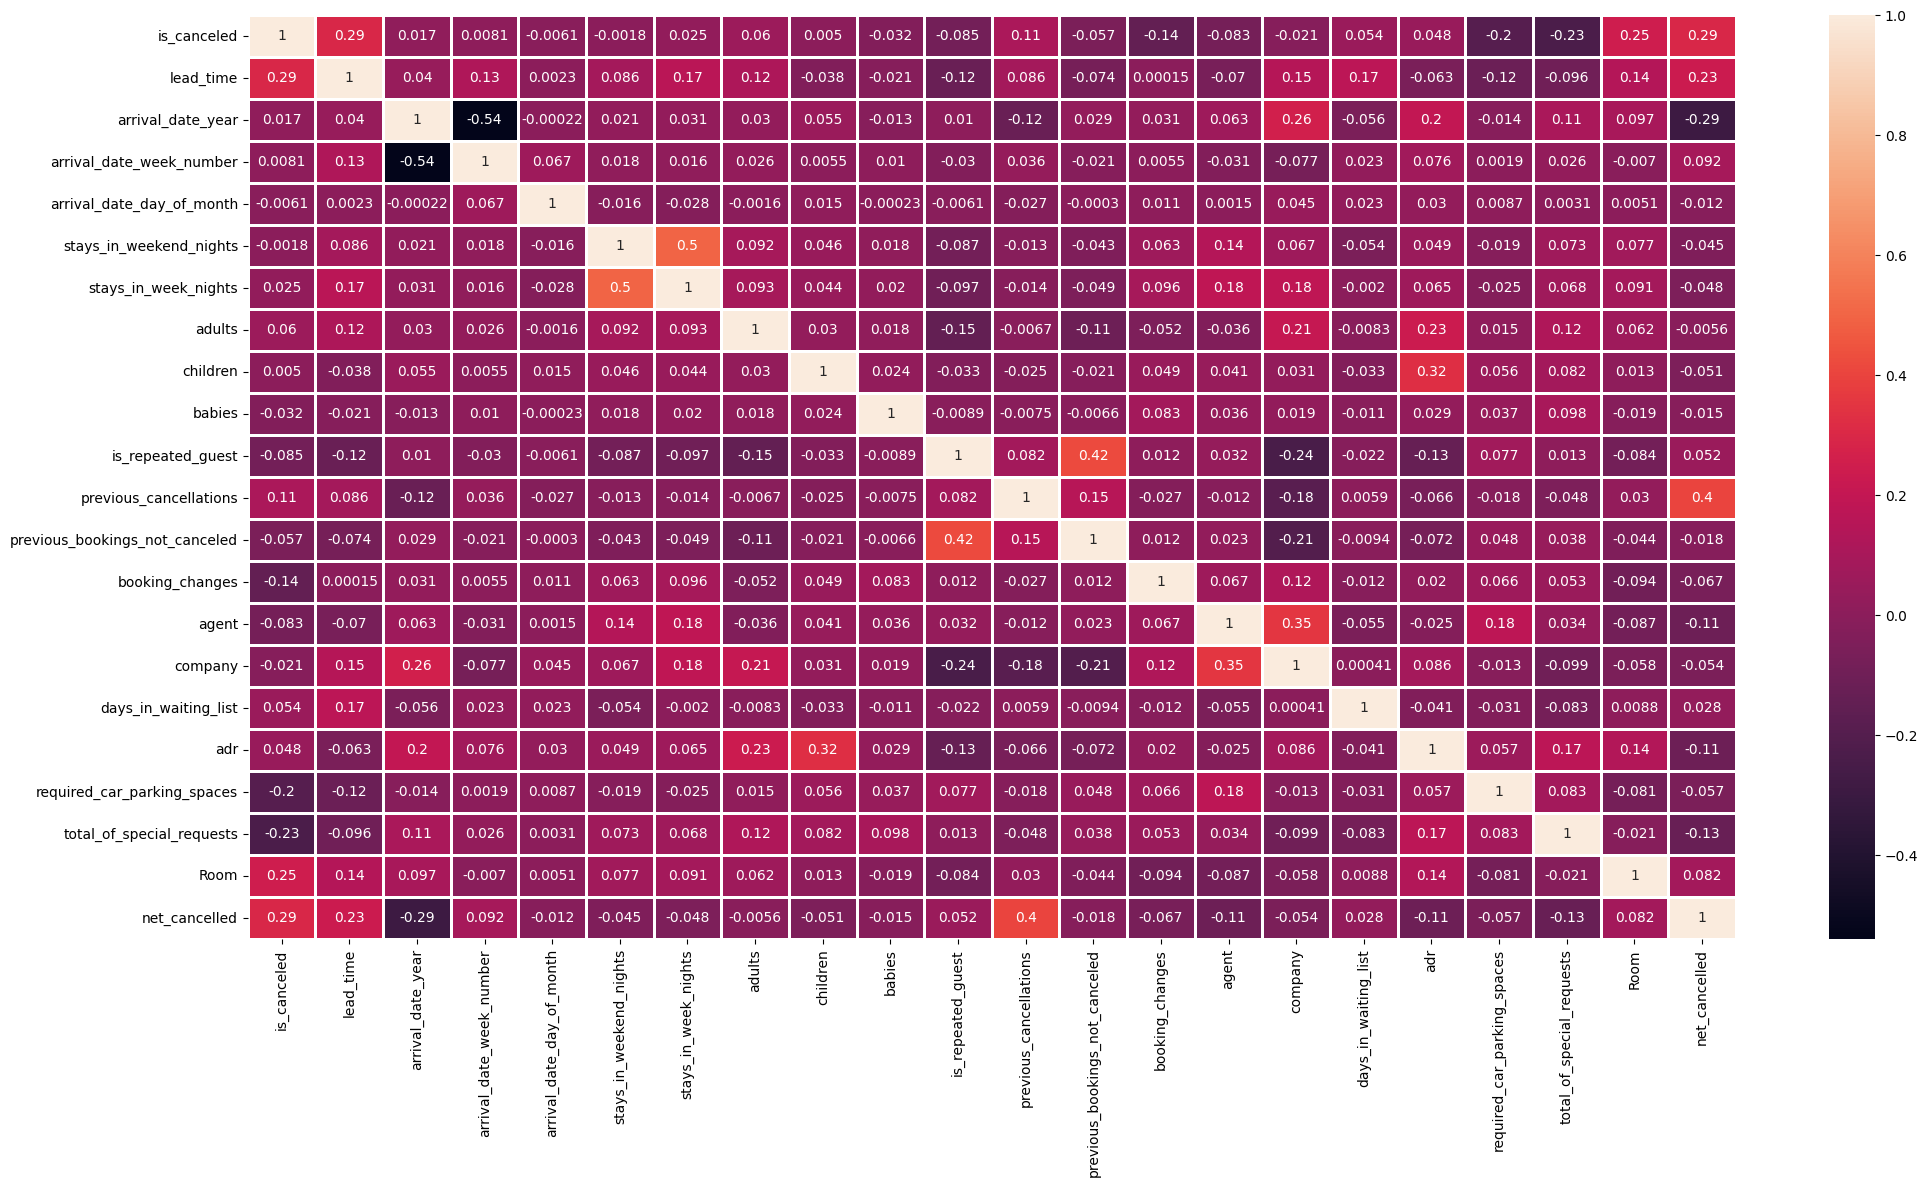

In [5]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
# Creating a line plot to show the monthly hotel booking trend for each hotel type

# Convert 'arrival_date_month' to numerical format for plotting
months = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
hotel_booking_data['month_num'] = hotel_booking_data['arrival_date_month'].map(months)

# Creating a pivot table for monthly booking trend
monthly_booking_trend = pd.pivot_table(hotel_booking_data, values='is_canceled', 
                                       index='month_num', 
                                       columns='hotel', 
                                       aggfunc='count',
                                       fill_value=0)

# Normalizing the data for each hotel type
monthly_booking_trend_normalized = monthly_booking_trend.div(monthly_booking_trend.sum(axis=0), axis=1) * 100

# Plotting the monthly booking trend
monthly_booking_trend_normalized.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Monthly Hotel Booking Trend')
plt.xlabel('Month')
plt.ylabel('Percentage of Bookings (%)')
plt.xticks(range(1, 13), list(months.keys()), rotation=45)
plt.legend(title='Hotel Type')
plt.grid(True)
plt.show()


In [6]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\599440065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)


is_canceled                       1.000000
lead_time                         0.293123
net_cancelled                     0.292931
Room                              0.247770
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [7]:
# dropping columns that are not useful

useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Room,net_cancelled
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,Transient,0.0,0,0,2015-07-01,1,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,Transient,0.0,0,0,2015-07-01,1,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,Transient,75.0,0,0,2015-07-02,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,Transient,75.0,0,0,2015-07-02,1,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,Transient,98.0,0,1,2015-07-03,1,0


In [9]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [10]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [11]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\969594972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\969594972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\969594972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [12]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\571720973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)


In [13]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [14]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\1679596210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\1679596210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13072\1679596210.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [15]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3


In [16]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
0,342,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.00,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.00,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,0,NaN,NaN,75.00,0,0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,NaN,75.00,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,NaN,98.00,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,NaN,96.14,0,0,1,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,NaN,225.43,0,2,1,0
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,NaN,157.71,0,4,1,0
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,NaN,104.40,0,0,1,0


In [17]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158851
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             12271.000406
company                           17333.042879
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
Room                                  0.109334
net_cancelled                         0.046840
dtype: float64

In [18]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
num_df.var()

lead_time                         2.591420
arrival_date_week_number          0.441039
arrival_date_day_of_month         0.506267
stays_in_weekend_nights           0.997229
stays_in_week_nights              3.641554
adults                            0.335543
children                          0.158851
babies                            0.009494
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    2.242317
agent                             2.536204
company                           0.755665
adr                               0.540353
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
Room                              0.109334
net_cancelled                     0.046840
dtype: float64

In [20]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
0,342,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.00,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.00,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,0,NaN,NaN,75.00,0,0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,NaN,75.00,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,NaN,98.00,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,NaN,96.14,0,0,1,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,NaN,225.43,0,2,1,0
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,NaN,157.71,0,4,1,0
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,NaN,104.40,0,0,1,0


In [21]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158851
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             12271.000406
company                           17333.042879
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
Room                                  0.109334
net_cancelled                         0.046840
dtype: float64

In [22]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [23]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
0,342,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,0,NaN,NaN,0.0,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,0,NaN,NaN,75.0,0,0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,NaN,75.0,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,NaN,98.0,0,1,1,0


In [24]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [25]:
X[['agent']] = X[['agent']].fillna(0.0)
# Drop specified columns
columns_to_drop = ["company"]
X.drop(columns=columns_to_drop, inplace=True)

In [26]:
num = X['reserved_room_type'].mode()[0]
X['reserved_room_type'].fillna(num, inplace=True)

In [27]:
X['children'].fillna(round(X.children.mean()), inplace=True)

In [28]:
X.shape, y.shape

((119390, 27), (119390,))

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   meal                            119390 non-null  int64  
 2   market_segment                  119390 non-null  int64  
 3   distribution_channel            119390 non-null  int64  
 4   reserved_room_type              119390 non-null  float64
 5   deposit_type                    119390 non-null  int64  
 6   customer_type                   119390 non-null  int64  
 7   year                            119390 non-null  int64  
 8   month                           119390 non-null  int64  
 9   day                             119390 non-null  int64  
 10  lead_time                       119390 non-null  int64  
 11  arrival_date_week_number        119390 non-null  int64  
 12  arrival_date_day

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [40]:
# Define models
log_reg = LogisticRegression(C=1)
decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_split=5)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',learning_rate=0.2,n_estimators=200)
neural_net = MLPClassifier(max_iter=1000,alpha=0.01,hidden_layer_sizes=(50,50))

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Initialize StratifiedKFold for cross-validation
strat_k_fold = StratifiedKFold(n_splits=5)

# Store models in a list for easy iteration
models = [log_reg, decision_tree, xgb, neural_net]

# Iterate over models and calculate scores
for model in models:
    model_name = model.__class__.__name__
    cv_results = cross_validate(model, X, y, cv=strat_k_fold, scoring=scoring)
    
    print(f"Model: {model_name}")
    for metric in scoring:
        average_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()} Score: {average_score:.2f}")
    print("\n")

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Model: LogisticRegression
Accuracy Score: 0.75
Precision Score: 0.73
Recall Score: 0.51
F1 Score: 0.59


Model: DecisionTreeClassifier
Accuracy Score: 0.77
Precision Score: 0.92
Recall Score: 0.42
F1 Score: 0.56


Model: XGBClassifier
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.97
F1 Score: 0.97


Model: MLPClassifier
Accuracy Score: 0.99
Precision Score: 1.00
Recall Score: 0.99
F1 Score: 0.99




In [41]:
# Define models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
neural_net = MLPClassifier(max_iter=1000)

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Initialize StratifiedKFold for cross-validation
strat_k_fold = StratifiedKFold(n_splits=5)

# Store models in a list for easy iteration
models = [log_reg, decision_tree, xgb, neural_net]

# Iterate over models and calculate scores
for model in models:
    model_name = model.__class__.__name__
    cv_results = cross_validate(model, X, y, cv=strat_k_fold, scoring=scoring)
    
    print(f"Model: {model_name}")
    for metric in scoring:
        average_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()} Score: {average_score:.2f}")
    print("\n")

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Model: LogisticRegression
Accuracy Score: 0.75
Precision Score: 0.73
Recall Score: 0.51
F1 Score: 0.59


Model: DecisionTreeClassifier
Accuracy Score: 0.48
Precision Score: 0.38
Recall Score: 0.59
F1 Score: 0.45


Model: XGBClassifier
Accuracy Score: 0.96
Precision Score: 0.95
Recall Score: 0.96
F1 Score: 0.95


Model: MLPClassifier
Accuracy Score: 0.99
Precision Score: 1.00
Recall Score: 0.97
F1 Score: 0.98




In [37]:
# Define hyperparameter grids for each model
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
decision_tree_params = {'max_depth': [None,5, 10, 20], 'min_samples_split': [2, 5, 10]}
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
neural_net_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                     'alpha': [0.0001, 0.001, 0.01]}

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
neural_net = MLPClassifier(max_iter=1000)

# Initialize GridSearchCV objects
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, cv=5)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)
neural_net_grid = GridSearchCV(neural_net, neural_net_params, cv=5)

# Perform grid search for each model
for model_grid in [log_reg_grid, decision_tree_grid, xgb_grid, neural_net_grid]:
    model_grid.fit(X, y)  # Replace X, y with your actual data
    print(f"Best parameters for {model_grid.estimator.__class__.__name__}: {model_grid.best_params_}")


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Best parameters for LogisticRegression: {'C': 1}
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_split': 5}
Best parameters for XGBClassifier: {'learning_rate': 0.2, 'n_estimators': 200}
Best parameters for MLPClassifier: {'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


In [46]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
neural_net = MLPClassifier(max_iter=1000)

# Train the model
neural_net.fit(X_train, y_train)

# Predict on training and testing sets
train_predictions = neural_net.predict(X_train)
test_predictions = neural_net.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9981991791607338
Testing Accuracy: 0.9971103107462936


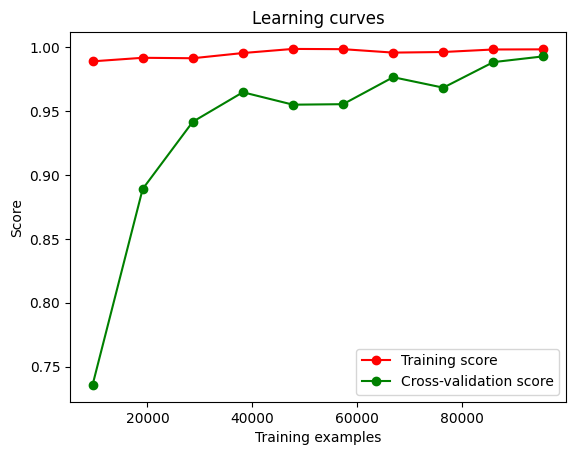

In [49]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = neural_net,
    X = X, y = y, train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5, scoring = 'accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


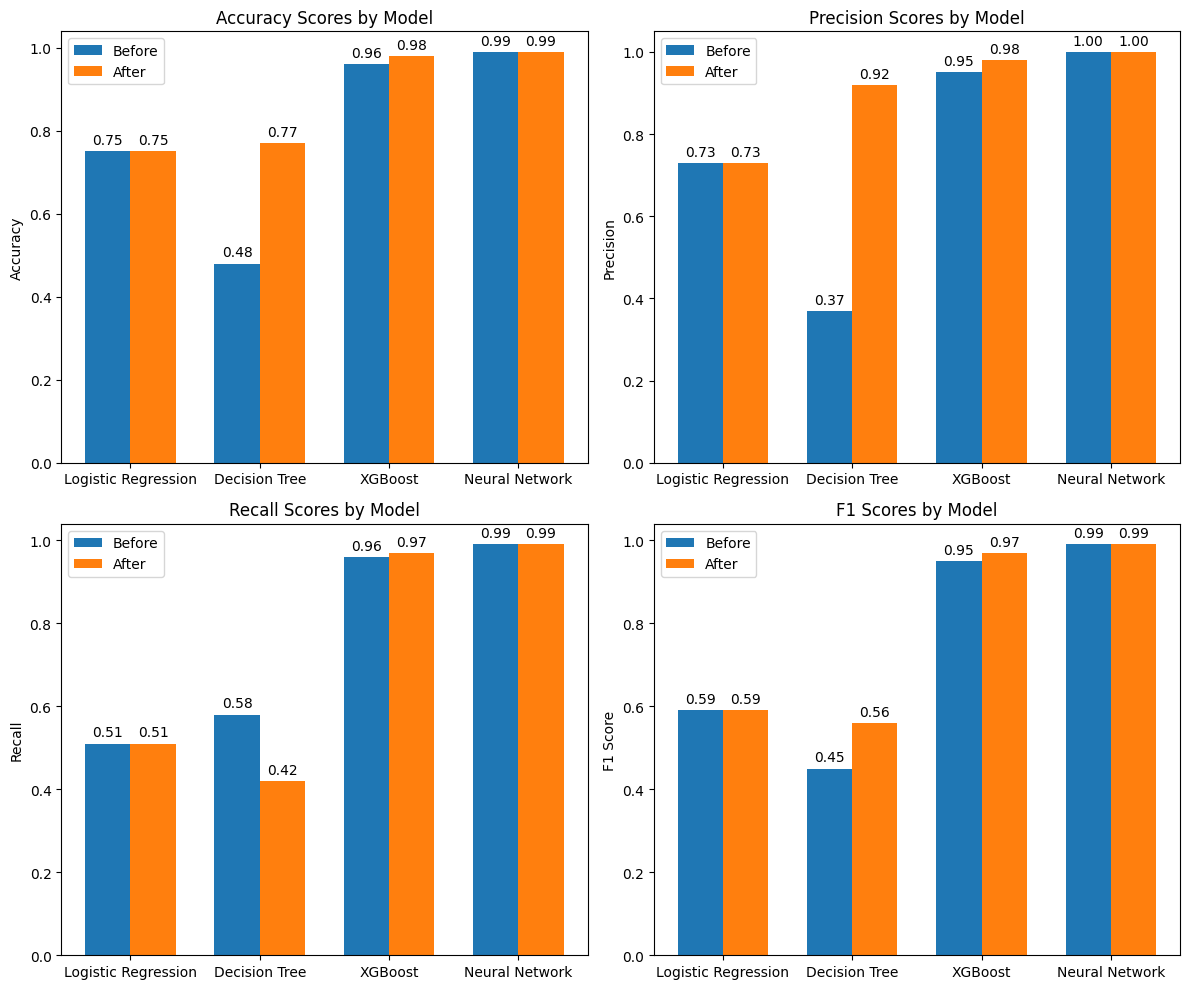

In [48]:
# Data for plotting
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'Neural Network']

# Before tuning
accuracy_before = [0.75, 0.48, 0.96, 0.99]
precision_before = [0.73, 0.37, 0.95, 1.00]
recall_before = [0.51, 0.58, 0.96, 0.99]
f1_before = [0.59, 0.45, 0.95, 0.99]

# After tuning
accuracy_after = [0.75, 0.77, 0.98, 0.99]
precision_after = [0.73, 0.92, 0.98, 1.00]
recall_after = [0.51, 0.42, 0.97, 0.99]
f1_after = [0.59, 0.56, 0.97, 0.99]

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Function to add value labels on the bars
def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Accuracy
rects1 = ax[0, 0].bar(x - width/2, accuracy_before, width, label='Before')
rects2 = ax[0, 0].bar(x + width/2, accuracy_after, width, label='After')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Accuracy Scores by Model')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(model_names)
ax[0, 0].legend()
add_value_labels(ax[0, 0], rects1)
add_value_labels(ax[0, 0], rects2)

# Precision
rects1 = ax[0, 1].bar(x - width/2, precision_before, width, label='Before')
rects2 = ax[0, 1].bar(x + width/2, precision_after, width, label='After')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('Precision Scores by Model')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(model_names)
ax[0, 1].legend()
add_value_labels(ax[0, 1], rects1)
add_value_labels(ax[0, 1], rects2)

# Recall
rects1 = ax[1, 0].bar(x - width/2, recall_before, width, label='Before')
rects2 = ax[1, 0].bar(x + width/2, recall_after, width, label='After')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Recall Scores by Model')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(model_names)
ax[1, 0].legend()
add_value_labels(ax[1, 0], rects1)
add_value_labels(ax[1, 0], rects2)

# F1 Score
rects1 = ax[1, 1].bar(x - width/2, f1_before, width, label='Before')
rects2 = ax[1, 1].bar(x + width/2, f1_after, width, label='After')
ax[1, 1].set_ylabel('F1 Score')
ax[1, 1].set_title('F1 Scores by Model')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(model_names)
ax[1, 1].legend()
add_value_labels(ax[1, 1], rects1)
add_value_labels(ax[1, 1], rects2)

plt.tight_layout()
plt.show()


In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8165396320183154
Confusion Matrix : 
[[21139  1396]
 [ 5175  8107]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     22535
           1       0.85      0.61      0.71     13282

    accuracy                           0.82     35817
   macro avg       0.83      0.77      0.79     35817
weighted avg       0.82      0.82      0.81     35817



c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
y_train_pred = logreg.predict(X_train)

# Evaluate the model on the training set
print("Model Performance on Training Set:")
print(classification_report(y_train, y_train_pred))
# Predictions on the test set
y_test_pred = logreg.predict(X_test)

# Evaluate the model on the test set
print("Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))


# Calculate log loss on the training set
train_loss = log_loss(y_train, logreg.predict_proba(X_train))

# Calculate log loss on the test set
test_loss = log_loss(y_test, logreg.predict_proba(X_test))

print("Log Loss on Training Set:", train_loss)
print("Log Loss on Test Set:", test_loss)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     22535
           1       0.85      0.61      0.71     13282

    accuracy                           0.82     35817
   macro avg       0.83      0.77      0.79     35817
weighted avg       0.82      0.82      0.81     35817

Confusion Matrix:
[[21139  1396]
 [ 5175  8107]]
Model Performance on Training Set:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     52631
           1       0.85      0.60      0.71     30942

    accuracy                           0.81     83573
   macro avg       0.83      0.77      0.79     83573
weighted avg       0.82      0.81      0.81     83573

Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     22535
           1       0.85      0.61      0.71     13282

    accuracy            

In [110]:
# Initialize the Decision Tree model
decision_tree = XGBClassifier()

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
print("XGB Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
# Evaluate the model on the training set
print("Model Performance on Training Set:")
print(classification_report(y_train, y_train_pred))
# Predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Evaluate the model on the test set
print("Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))


# Calculate log loss on the training set
train_loss = log_loss(y_train, decision_tree.predict_proba(X_train))

# Calculate log loss on the test set
test_loss = log_loss(y_test, decision_tree.predict_proba(X_test))

print("Log Loss on Training Set:", train_loss)
print("Log Loss on Test Set:", test_loss)


XGB Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22535
           1       1.00      1.00      1.00     13282

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817

Confusion Matrix:
[[22519    16]
 [   47 13235]]
Model Performance on Training Set:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     52631
           1       0.85      0.60      0.71     30942

    accuracy                           0.81     83573
   macro avg       0.83      0.77      0.79     83573
weighted avg       0.82      0.81      0.81     83573

Model Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22535
           1       1.00      1.00      1.00     13282

    accuracy                           1

In [99]:
# Example with Random Forest model
model = LogisticRegression(C=100, penalty='l2')

# Perform cross-validation and track training scores
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True, scoring='accuracy')

# Extract training and validation scores
train_scores = cv_results['train_score']
validation_scores = cv_results['test_score']

# Output average training and validation scores
print(f"Average Training Accuracy: {train_scores.mean():.2f}")
print(f"Average Validation Accuracy: {validation_scores.mean():.2f}")


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Average Training Accuracy: 0.82
Average Validation Accuracy: 0.70


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9490505279096506


In [92]:
# Defining the RandomForest model with the specified parameters
model = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_split=2, random_state=42)

# Perform cross-validation and track training scores
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True, scoring='accuracy')

# Extract training and validation scores
train_scores = cv_results['train_score']
validation_scores = cv_results['test_score']

# Output average training and validation scores
print(f"Average Training Accuracy: {train_scores.mean():.2f}")
print(f"Average Validation Accuracy: {validation_scores.mean():.2f}")


Average Training Accuracy: 0.79
Average Validation Accuracy: 0.76


In [42]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# Initialize a Logistic Regression classifier
logreg = LogisticRegression(solver='liblinear')  # 'liblinear' is a good choice for small datasets and binary classification

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 100, 'penalty': 'l1'}
Test Accuracy: 0.82


In [47]:
# Example with Random Forest model
model = DecisionTreeClassifier( )

# Perform cross-validation and track training scores
cv_results = cross_validate(model, X, y, cv=5, return_train_score=True, scoring='accuracy')

# Extract training and validation scores
train_scores = cv_results['train_score']
validation_scores = cv_results['test_score']

# Output average training and validation scores
print(f"Average Training Accuracy: {train_scores.mean():.2f}")
print(f"Average Validation Accuracy: {validation_scores.mean():.2f}")

Average Training Accuracy: 1.00
Average Validation Accuracy: 0.47


In [48]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1)
# Assuming X_train and y_train are your training data and labels
grid_search.fit(X_train, y_train)
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_dt = grid_search.best_estimator_

# Evaluate on the test set
test_accuracy = best_dt.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Test Accuracy: 0.95


In [109]:
# If X and y are pandas structures, convert them to numpy arrays
X_np = X.to_numpy()
y_np = y.to_numpy()

def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Determine input shape from X
input_shape = X_np.shape[1]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
cv_scores = []

for train, test in kfold.split(X_np, y_np):
    # Create a new model for each fold
    model = create_model(input_shape)

    # Fit the model
    model.fit(X_np[train], y_np[train], epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_np[test], y_np[test], verbose=0)
    print(f"Score for fold {fold_no}: Accuracy of {scores[1]*100}%")
    cv_scores.append(scores[1])
    fold_no += 1

# Calculate and print the average cross-validation score
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores)*100:.2f}%")




Score for fold 1: Accuracy of 98.03166389465332%
Score for fold 2: Accuracy of 98.55515360832214%
Score for fold 3: Accuracy of 98.5258400440216%
Score for fold 4: Accuracy of 98.56353402137756%
Score for fold 5: Accuracy of 98.39601516723633%
Average Cross-Validation Accuracy: 98.41%


In [111]:
# Scale the features (Neural networks usually require feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # Optimizer
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Metrics to monitor

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("\nTest accuracy:", test_accuracy)


Epoch 1/10
2090/2090 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9159 - val_loss: 0.0756 - val_accuracy: 0.9785
Epoch 2/10
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0491 - val_accuracy: 0.9830
Epoch 3/10
2090/2090 [==============================] - 8s 4ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0369 - val_accuracy: 0.9901
Epoch 4/10
2090/2090 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 5/10
2090/2090 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0255 - val_accuracy: 0.9921
Epoch 6/10
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0371 - val_accuracy: 0.9895
Epoch 7/10
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0315 - val_accuracy:

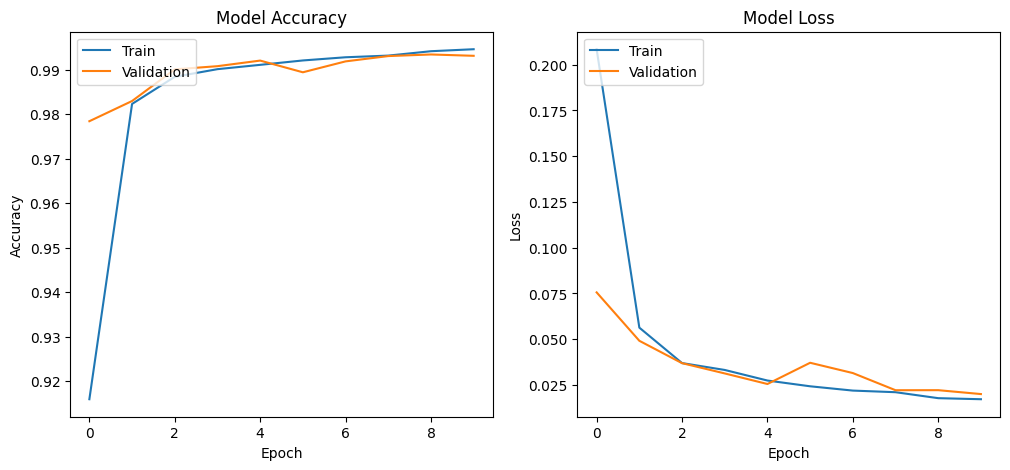

In [112]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [113]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred).astype(int)  # Converting probabilities to binary predictions

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


1120/1120 [==============================] - 2s 1ms/step
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
